# Intro-to-Astro Week 3
## NASA Exoplanet Archive Assignment

This week, we learned about exoplanet detection methods and explored the NASA Exoplanet Archive together. In this assignment, you will practice using Exoplanet Archive by downloading data and creating some informative plots. 

### Part 1: Finding your data
Launch the NASA Exoplanet Archive at [this link](https://exoplanetarchive.ipac.caltech.edu/). Before we get into data manipulation with Python, let's check out some of the utility of the online portal. Navigate to the "Planetary Systems Composite Data" table.

List the first 3 authors who discovered TOI-6324 b:
- Rana A. Lee
- Fei Dai
- Andrew W. Howard


How many systems list position information (RA, Dec) from sources that are not the TICv8 (TESS Input Catalog)?
- 254

Explore one of these position reference papers. What was the purpose of their survey?
- Ban, M., et al. "AT2021uey: A planetary microlensing event outside the Galactic bulge." Astronomy & Astrophysics 697 (2025): A57.

The purpose of the survey was to analyse a microlensing event observed by GAIA, and ZTF and ASAS-SN surveys. 


*Hints: Play around with the different columns of data available under 'Select Columns'. You can type in the column headers to search for specific values in the table.*

Now that we have poked around online, let's download the data and plot it. Reset the table by refreshing the page, so your filters and selections are removed. Select "Download Table" and save to your data directory. This CSV file holds information on all the currently confirmed exoplanets. Follow the code prompts below to read in this data file.

In [1]:
# To start, let's import the necessary libraries for this assignment.

import os                           # for file and directory operations
import pandas as pd                 # for data manipulation and analysis
import matplotlib.pyplot as plt     # for plotting data
import numpy as np                  # for numerical operations

# to display plots inline in Jupyter Notebook, use this 'magic command':
%matplotlib inline

In [22]:
# Locate the data file you downloaded from the NASA Exoplanet Archive and read it into a DataFrame

dir =  '/Users/mav/Library/CloudStorage/OneDrive-Personal/Intro2Astro/Week 3/' # replace with your actual data directory
file = 'PSCompPars_2025.07.22_09.32.42.csv' # replace with your actual data file name
path = os.path.join(dir, file)

# Read the CSV file into a DataFrame
df = pd.read_csv(path, comment='#')
df # let's see what our data table looks like

,loc_rowid,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
0,1,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,323.210000,...,-1.92380,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
1,2,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.219970,...,-1.97650,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
2,3,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,186.760000,...,-0.71400,5.23133,0.023,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826
3,4,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,1765.038900,...,-0.00730,6.61935,0.023,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351
4,5,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,0,798.500000,...,-0.01110,6.21500,0.016,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5928,5929,ups And b,ups And,2,3,Radial Velocity,1996,Lick Observatory,0,4.617033,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5929,5930,ups And c,ups And,2,3,Radial Velocity,1999,Multiple Observatories,0,241.258000,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5930,5931,ups And d,ups And,2,3,Radial Velocity,1999,Multiple Observatories,0,1276.460000,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5931,5932,ups Leo b,ups Leo,1,1,Radial Velocity,2021,Okayama Astrophysical Observatory,0,385.200000,...,-0.89630,4.30490,0.023,-0.023,2.184,0.248,-0.248,4.03040,0.008513,-0.008513


In [4]:
# Let's see what columns are available in the DataFrame
print(df.columns) # Note: descriptions of the columns can be found in the beginning of the CSV file

Index(['loc_rowid', 'pl_name', 'hostname', 'sy_snum', 'sy_pnum',
       'discoverymethod', 'disc_year', 'disc_facility', 'pl_controv_flag',
       'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim',
       'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim',
       'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj',
       'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim', 'pl_bmasse',
       'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj',
       'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov',
       'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim',
       'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt',
       'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'ttv_flag', 'st_spectype',
       'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad',
       'st_raderr1', 'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1',
       'st_masserr2', 'st_masslim', 'st_met', 'st_meterr1', '

In the following code cells, create and print variables that will provide some information about our data table, such as the number of planets in the table, the discovery facilities, etc.

In [6]:
# How many planets are in the table?
num_planets = len(df)
print("Number of plantes in the table:", num_planets)

Number of plantes in the table: 5933


In [7]:
# How many discovery facilities are listed in the table?
discovery_facilities = df['disc_facility'].dropna().unique()
num_disc_fac = len(discovery_facilities)
print("The number of discovery facilities is:", num_disc_fac)

The number of discovery facilities is: 72


### Part 2: Plotting your data

Now that we have taken a look at the data table, let's start using it! We can recreate one of the plots we looked at together on Exoplanet Archive as a quick example.

Text(0, 0.5, 'Mass (Jupiter Masses)')

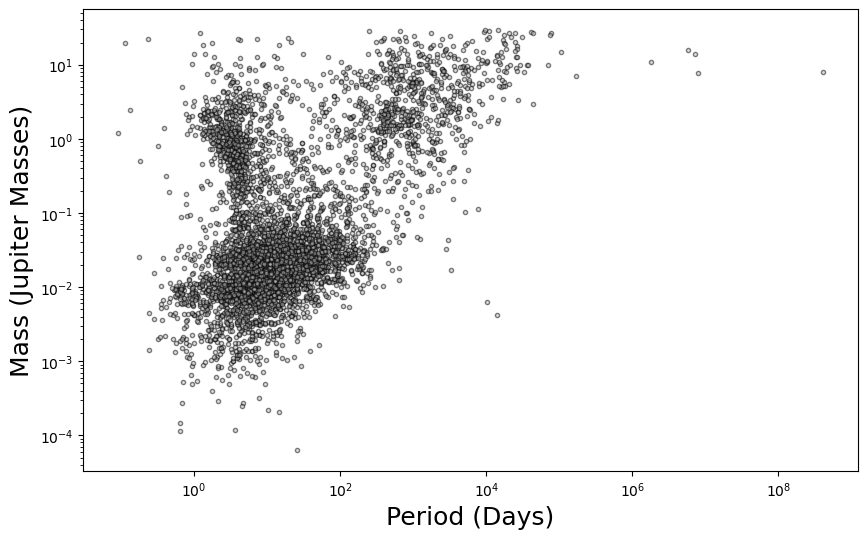

In [8]:
# create a scatter plot of Period (Days) vs Mass (Jupiter Masses) 

# create a figure object and set its size
plt.figure(figsize=(10, 6))

# plot the relevant columns from the DataFrame. 
# You can adjust different parameters like alpha (transparency), color, edgecolor, marker, etc.
plt.scatter(df['pl_orbper'], df['pl_bmassj'], alpha=0.5, color='silver', edgecolor='k', marker='.')

# set the x and y scales to logarithmic so that we can see the data better
plt.xscale('log')
plt.yscale('log')

# label your axes
plt.xlabel('Period (Days)', fontsize=18)
plt.ylabel('Mass (Jupiter Masses)', fontsize=18)


The above plot shows us the distribution of planet masses and periods like the one on Exoplanet Archive. However, we can take it a step further and distinguish the points according to their discovery method, like the plot online.

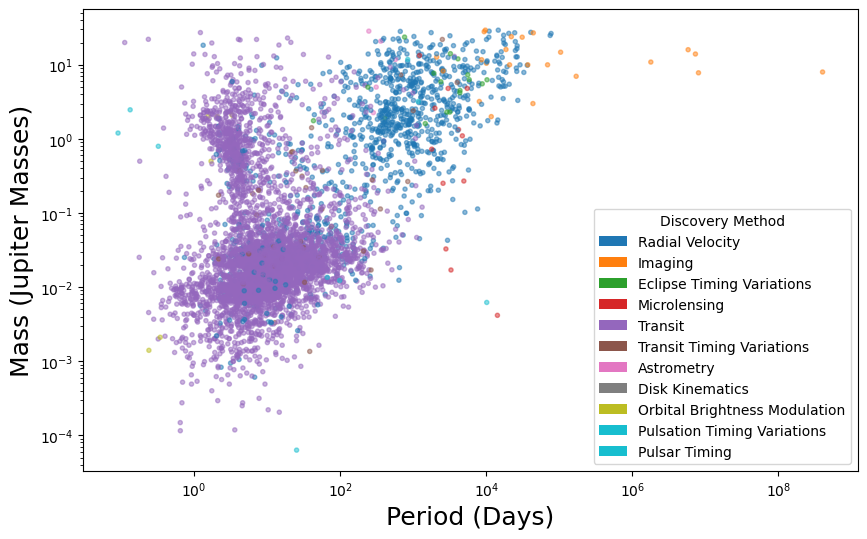

In [9]:
# Taking the same setup as above, but now we will color the points by discovery method
plt.figure(figsize=(10, 6))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Period (Days)', fontsize=18)
plt.ylabel('Mass (Jupiter Masses)', fontsize=18)

# convert discovery methods to numeric codes for coloring, and hold labels
discmethods = df['discoverymethod']
dm_num = pd.factorize(discmethods)[0]

# use the 'c' parameter to color the points by discovery method
cmap = plt.cm.tab10 # choose a colormap
colors = cmap(dm_num / dm_num.max())  # normalize the numeric codes for color mapping
plt.scatter(df['pl_orbper'], df['pl_bmassj'], c=colors, alpha=0.5, marker='.') #plot data

# add a legend to indicate which color corresponds to which discovery method
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=cmap(i/dm_num.max()), label=label) for i, label in enumerate(discmethods.unique())]
plt.legend(handles=legend_elements, title='Discovery Method', loc='lower right')

Now that you've seen an example, recreate another plot that was already generated on the NASA Exoplanet archive.

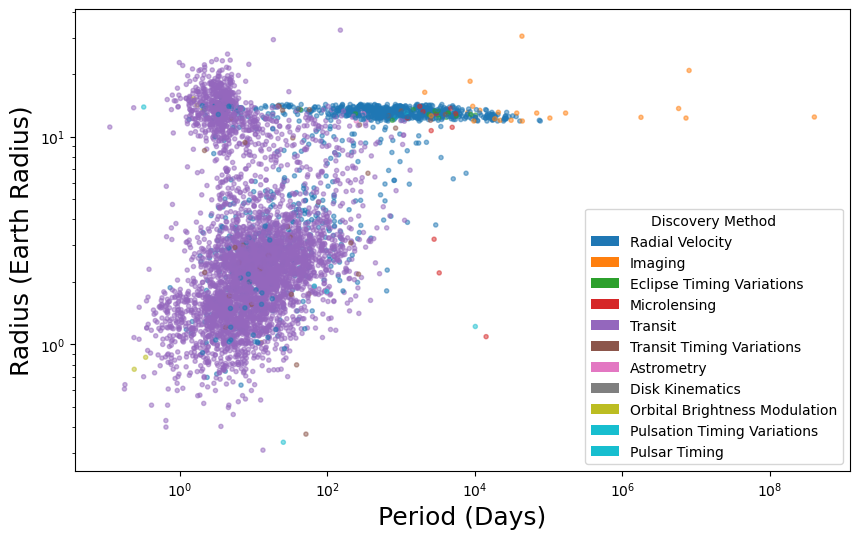

In [10]:
# code here

# Taking the same setup as above, but now we will color the points by discovery method
plt.figure(figsize=(10, 6))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Period (Days)', fontsize=18)
plt.ylabel('Radius (Earth Radius)', fontsize=18)

# convert discovery methods to numeric codes for coloring, and hold labels
discmethods = df['discoverymethod']
dm_num = pd.factorize(discmethods)[0]

# use the 'c' parameter to color the points by discovery method
cmap = plt.cm.tab10 # choose a colormap
colors = cmap(dm_num / dm_num.max())  # normalize the numeric codes for color mapping
plt.scatter(df['pl_orbper'], df['pl_rade'], c=colors, alpha=0.5, marker='.') #plot data

# add a legend to indicate which color corresponds to which discovery method
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=cmap(i/dm_num.max()), label=label) for i, label in enumerate(discmethods.unique())]
plt.legend(handles=legend_elements, title='Discovery Method', loc='lower right')

### Part 3: Filtering your data

We saw during the live session that we can filter the data table to include only a subset of planets that we're particularly interested in. Since we downloaded all systems already, we can also filter them here. Let's explore the different kinds of planets that have been discovered by TESS and Kepler, the two main transiting planet missions.

In [11]:
# create Boolean masks to filter the DataFrame for planets discovered by TESS and by Kepler
tess_mask = df['disc_facility'].str.contains('TESS', case=False, na=False)
kepler_mask = df['disc_facility'].str.contains('Kepler', case=False, na=False)

# filter the DataFrame using the masks
tess_planets = df[tess_mask]
kepler_planets = df[kepler_mask]

# How many planets were discovered by TESS and Kepler?
print("The number of planets discovered by TESS and Kepled is:", len(tess_planets)+len(kepler_planets))



The number of planets discovered by TESS and Kepled is: 3427


Let's compare the different planet populations discovered by Kepler and by TESS. 

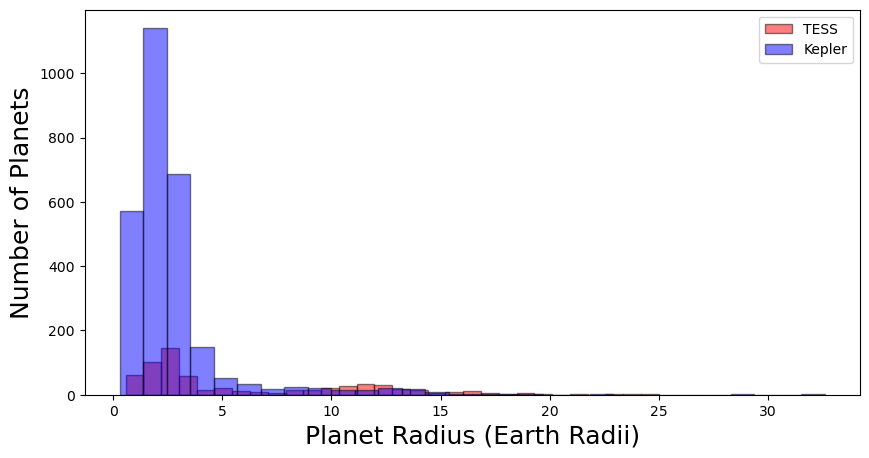

In [13]:
# create a histogram of planet radii for TESS and Kepler planets in Earth radii
plt.figure(figsize=(10, 5))

# plot the data
plt.hist(tess_planets['pl_rade'], bins=30, alpha=0.5, label='TESS', color='red', edgecolor='black')
plt.hist(kepler_planets['pl_rade'], bins=30, alpha=0.5, label='Kepler', color='blue', edgecolor='black')

plt.xlabel('Planet Radius (Earth Radii)',fontsize=18)
plt.ylabel('Number of Planets',fontsize=18)

plt.legend()

Let's improve this histogram to create a more informative visual comparison of the two distributions. We can assign common bins and set the axes to logarithmic scales, for example.

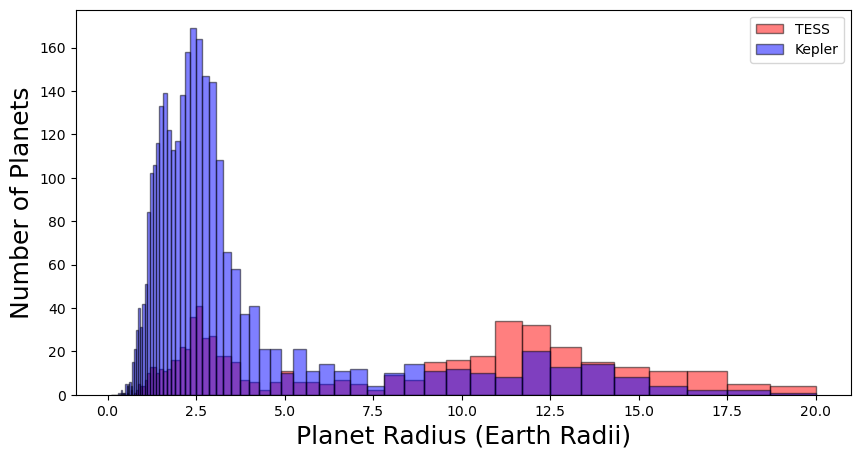

In [16]:
plt.figure(figsize=(10, 5))

# define informative bins for the histogram
bins_1 = np.logspace(np.log10(0.1), np.log10(20), 80) 

# finish on your own
plt.hist(tess_planets['pl_rade'], bins=bins_1, alpha=0.5, label='TESS', color='red', edgecolor='black')
plt.hist(kepler_planets['pl_rade'], bins=bins_1, alpha=0.5, label='Kepler', color='blue', edgecolor='black')

plt.xlabel('Planet Radius (Earth Radii)',fontsize=18)
plt.ylabel('Number of Planets',fontsize=18)

plt.legend()


What are the most notable differences between the two distributions? What are the similarities? Try re-plotting a 'zoomed-in' section of the above histogram to better view the 'radius valley'.

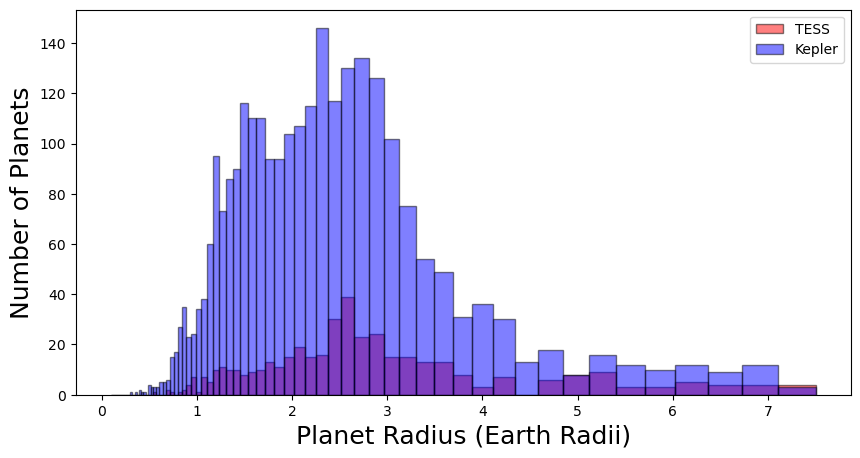

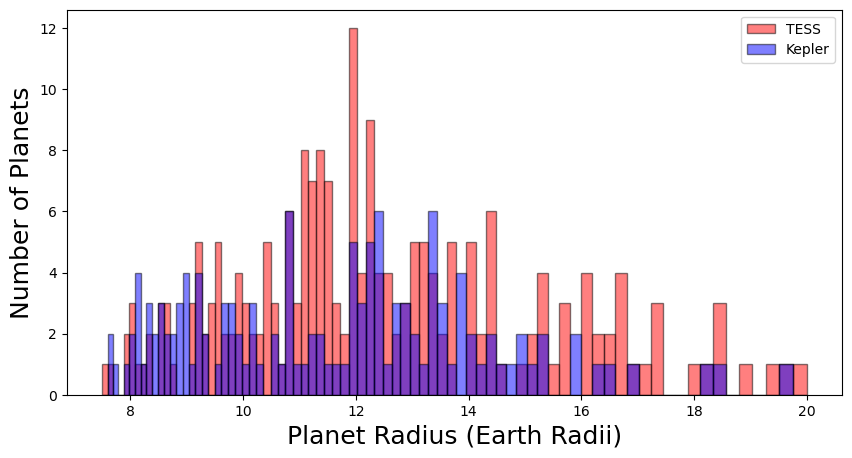

In [ ]:
# code here
plt.figure(figsize=(10, 5))

# define informative bins for the histogram
bins_1 = np.logspace(np.log10(0.1), np.log10(7.5), 80) 

# finish on your own
plt.hist(tess_planets['pl_rade'], bins=bins_1, alpha=0.5, label='TESS', color='red', edgecolor='black')
plt.hist(kepler_planets['pl_rade'], bins=bins_1, alpha=0.5, label='Kepler', color='blue', edgecolor='black')

plt.xlabel('Planet Radius (Earth Radii)',fontsize=18)
plt.ylabel('Number of Planets',fontsize=18)

plt.legend()

# code here
plt.figure(figsize=(10, 5))

# define informative bins for the histogram
bins_2 = np.logspace(np.log10(7.5), np.log10(20), 80) 

# finish on your own
plt.hist(tess_planets['pl_rade'], bins=bins_2, alpha=0.5, label='TESS', color='red', edgecolor='black')
plt.hist(kepler_planets['pl_rade'], bins=bins_2, alpha=0.5, label='Kepler', color='blue', edgecolor='black')

plt.xlabel('Planet Radius (Earth Radii)',fontsize=18)
plt.ylabel('Number of Planets',fontsize=18)

plt.legend()

# Kepler found more smaller planets that are between 1 and 7 Earth Radii. Whereas Tess found more larger planets that are  between 8 and 20 Earth Radii. Absolutely however Kepler found many more planets than TESS. 

Use different filters and functions on the data table to answer the following questions:
- How many planets were discovered using the Radial Velocity method?
- How far away is the furthest confirmed exoplanet? What is its name?
- How many planets are smaller than the Earth?

In [39]:
# create a mask for planets discovered by the Radial Velocity method
radial_mask = df['discoverymethod'] == 'Radial Velocity'

# find the furthest confirmed exoplanet
sy_dist_df = df.dropna(subset=['sy_dist'])
furthest_planet = sy_dist_df.loc[sy_dist_df['sy_dist'].idxmax()]


# count the number of planets smaller than Earth
radius_df = df.dropna(subset=['pl_rade'])
smaller_than_earth = radius_df[radius_df['pl_rade'] < 1]

count_smaller_than_earth = len(smaller_than_earth)

Now that we've had some practice, try out the following exercise. Select only planets that have mass measurements using the same Boolean mask method we did earlier. Then, select a subset of the planets with mass mesurements that also have planet radius measurements (i.e., planet radius and mass columns are not empty/NaN). 

In [45]:
# create a mask for planets with mass measurements
mass_mask = df['pl_bmasse'].notna()
selected_planets = df[mass_mask]

# create a mask for planets that also have planet radius measurements (i.e., planet radius column is not empty/NaN!)

radius_df_2 = df['pl_rade'].notna()
planets_with_rad = df[radius_df_2]


# how many planets were discovered by the Radial Velocity method?

count_radial_vel_met = len(radial_mask)

# how many of those have planet radius measurements?
radial_planets = df[radial_mask]

count_radial_vel_met = len(radial_planets)

rv_with_radius = radial_planets['pl_rade'].notna().sum()

Now that we have our filtered data, let's make a plot that informs us about this subset of planets. Make a Planet Density (g/cm^3) vs. Planet Radius (Earth Radius) plot. The unit conversions have been coded for you using the astropy package.

In [43]:
import astropy.units as u

# convert planet radius from Earth radii to centimeters
rad_cm = selected_planets['pl_rade'] * u.R_earth.to(u.cm)

# convert planet mass from Earth masses to g
mass_g = selected_planets['pl_bmasse'] * u.M_earth.to(u.g)

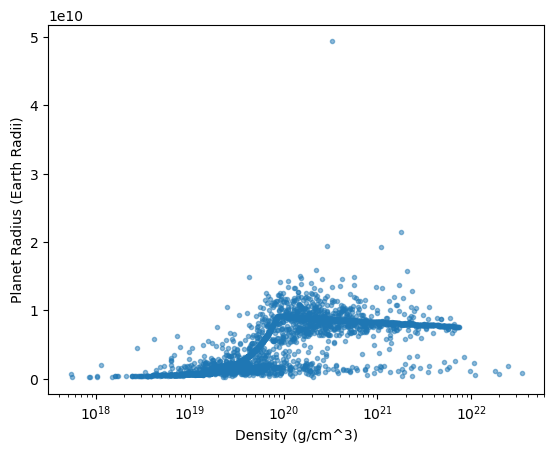

In [51]:
# calculate density in g/cm^3

density_list = mass_g/rad_cm 

# create a scatter plot of Density (g/cm^3) vs Planet Radius (Earth Radii)
plt.scatter(density_list, rad_cm, alpha=0.5, marker='.') #plot data
plt.xlabel("Density (g/cm^3)")
plt.ylabel('Planet Radius (Earth Radii)')
plt.xscale('log')


### Part 4: Choose your own adventure

Using the various things you've learned throughout this tutorial and assignment, create a plot to visualize the correlation between any parameters of your choosing. Choose a specific and interesting subset of planets (e.g., planets discovered via the radial velocity method, nearby planets, etc.). Write down some interesting things you learned from your plot. 

In [ ]:
# code here

# I read The Rememberance of Earth's Past at the beginning of the year. If I'm not wrong star systems at a distance of 50 ly were chosen for Luo Ji's gamble. I'd like to produce a plot of 